<a href="https://colab.research.google.com/github/Dsganeshkorada/Face_count_using_mtcnn/blob/main/FACE_COUNT_USING_MTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Set Up Paths and Load Data

In [ ]:
import pandas as pd

base_directory = "/content/drive/MyDrive/archive (8)"
train_directory = base_directory + "/train1"
image_directory = train_directory + "/image_data1"

# Load the CSV files
train_dataframe = pd.read_csv(base_directory + "/train1/train1.csv")
test_dataframe = pd.read_csv(base_directory + "/test.csv")
target = train_dataframe.columns[-1]  # The target column (usually the face count)


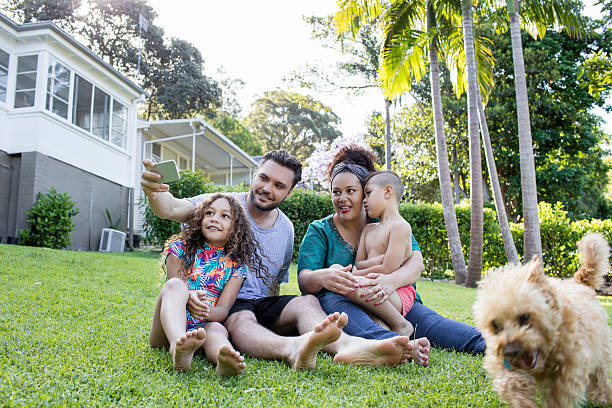

HeadCount:  4


In [ ]:
from IPython.display import Image

def display_image(filename, head_count='Test set'):
    display(Image(filename, width=700, height=200))
    print("HeadCount: ", head_count)

# Display a sample image with expected head count
display_image(image_directory + "/" + train_dataframe.iloc[0, 0], train_dataframe.iloc[0, 1])


**Boxes** **on** **Faces**

In [ ]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.4 MB/s eta 0:00:00


In [ ]:
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle, Circle

def draw_image_with_boxes(filename, result_list):
    fig, ax = plt.subplots(figsize=(15, 8))
    data = plt.imread(filename)
    plt.imshow(data)
    ax = plt.gca()
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        ax.add_patch(rect)
        for key, value in result['keypoints'].items():
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    plt.show()


 **Initialize Face Detector**

In [ ]:
detector = MTCNN()

**Define Function to Detect Faces in an Image**

In [ ]:
def detect_faces(filename):
    try:
        current_image = plt.imread(filename)
        boxes = detector.detect_faces(current_image)
        return len(boxes), boxes
    except ValueError:
        print(f"Error loading {filename}")
        return 0, []


**Analyze a Single Image**

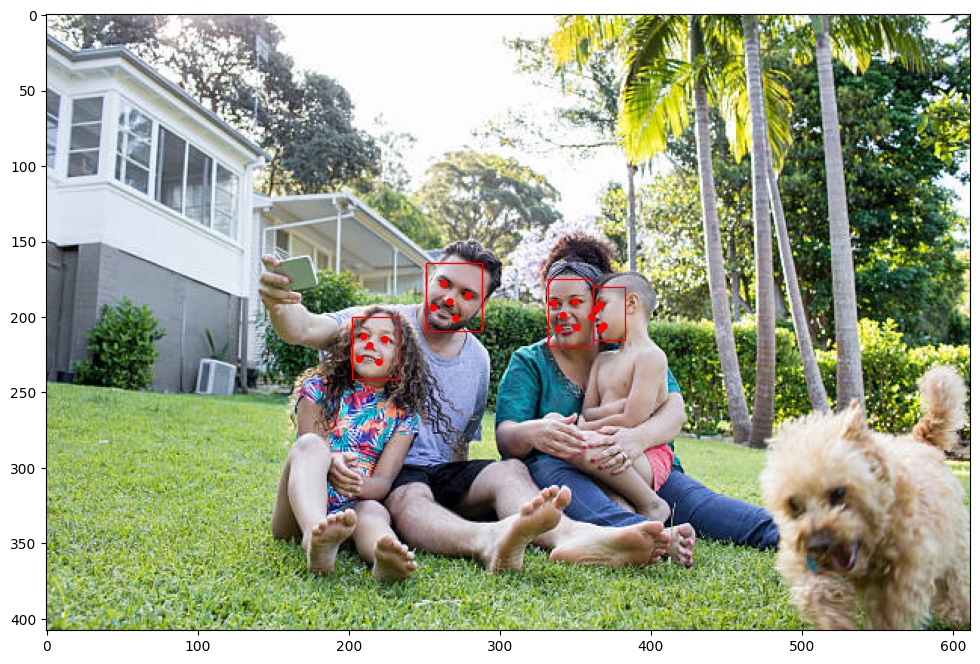

Expected count: 4, Detected count: 4


In [ ]:
def single_image_analysis(filename, expected_pred):
    detected_count, detected_boxes = detect_faces(filename)
    draw_image_with_boxes(filename, detected_boxes)
    print(f"Expected count: {expected_pred}, Detected count: {detected_count}")

# Test with a sample image
single_image_analysis(image_directory + "/" + train_dataframe.iloc[0, 0], train_dataframe.iloc[0, 1])


 **Run Face Detection on the Training Set**

In [ ]:
# Display column names to identify the correct column for image paths
print(train_dataframe.columns)


Index(['Name', 'HeadCount'], dtype='object')


In [ ]:
# Use 'Name' as the column for image filenames and 'HeadCount' as the target
image_files = train_dataframe['Name']
targets = train_dataframe['HeadCount']
predicted_counts = []

for image_file in tqdm(image_files):
    face_count, _ = detect_faces(image_directory + "/" + image_file)
    predicted_counts.append(face_count)

  3%|▎         | 46/1387 [00:40<16:10,  1.38it/s]

Error loading /content/drive/MyDrive/archive (8)/train1/image_data1/10070.jpg


 58%|█████▊    | 804/1387 [11:21<07:25,  1.31it/s]

Error loading /content/drive/MyDrive/archive (8)/train1/image_data1/11175.jpg


 84%|████████▍ | 1168/1387 [16:17<02:30,  1.46it/s]

Error loading /content/drive/MyDrive/archive (8)/train1/image_data1/11681.jpg


 99%|█████████▉| 1379/1387 [19:08<00:05,  1.50it/s]

Error loading /content/drive/MyDrive/archive (8)/train1/image_data1/11990.jpg


100%|██████████| 1387/1387 [19:14<00:00,  1.20it/s]


**Calculate R2 Score and Accuracy**

In [ ]:
from sklearn.metrics import r2_score

# R2 Score
print(f"R2 Score: {r2_score(targets, predicted_counts)}")

# Accuracy Calculation
correct_predictions = sum([1 for true, pred in zip(targets, predicted_counts) if true == pred])
accuracy = correct_predictions / len(targets)
print(f"Accuracy: {accuracy:.2%}")


R2 Score: 0.6566204893292198
Accuracy: 68.42%


**Display a Random Image with Predicted Face Count**

Detected face count: 33


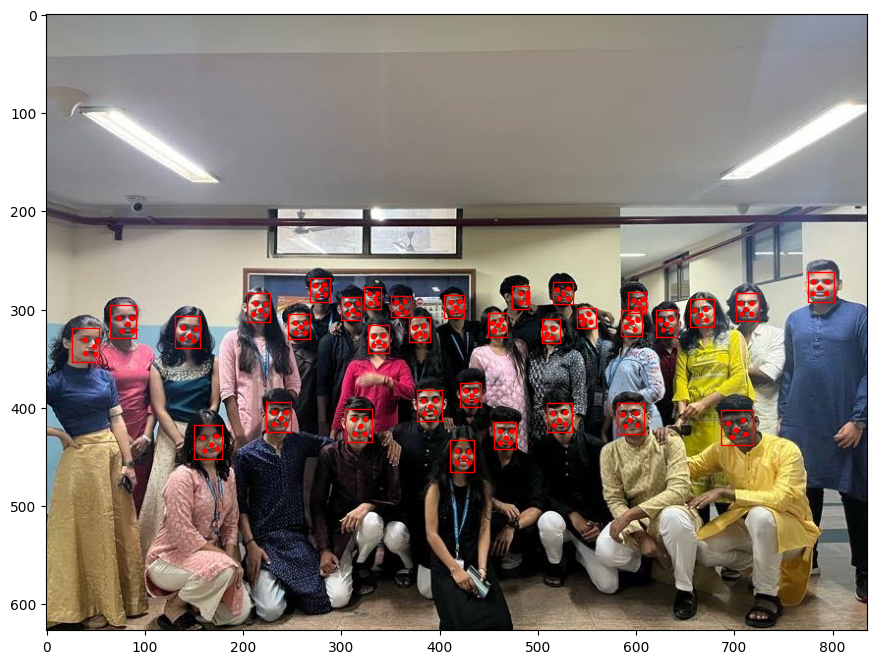

In [ ]:
# Define the exact image path you want to analyze
specific_image_path = "/content/drive/MyDrive/IMG_1230.jpg"  # Update with your actual image path

# Run face detection on the specified image
face_count, detected_boxes = detect_faces(specific_image_path)

# Display the result
print(f"Detected face count: {face_count}")

# Optionally, draw bounding boxes around detected faces
draw_image_with_boxes(specific_image_path, detected_boxes)